In [1]:
# Mengimpor pustaka yang diperlukan
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np 
import matplotlib.pyplot as plt

/Users/someoneee112/Work/python/Naive Bayes/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Memuat dataset MNIST (dataset angka tulisan tangan)
# Anda bisa menggantinya dengan dataset gambar lain
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Preprocessing data
# Mengubah dimensi data dan melakukan normalisasi (membuat nilai antara 0 dan 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


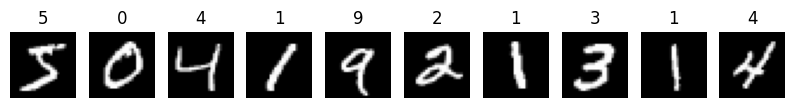

In [3]:
def plot_mnist_images(images,labels,num_images = 10):
    plt.figure(figsize=(10,2))
    for i in range(num_images):
        plt.subplot(1,num_images,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()
plot_mnist_images(train_images,train_labels,num_images=10)

In [4]:
# Mengubah label menjadi bentuk one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [5]:
# Membangun model CNN
model = models.Sequential()
# Menambahkan layer konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Menambahkan layer pooling (pengurangan dimensi)
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan layer konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Menambahkan layer konvolusi ketiga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Menambahkan layer dense (fully connected layer)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output 10 kelas (untuk klasifikasi 0-9)
# Melihat arsitektur model
model.summary()
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Melatih model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

/Users/someoneee112/Work/python/Naive Bayes/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8949 - loss: 0.3328 - val_accuracy: 0.9824 - val_loss: 0.0560
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9841 - loss: 0.0524 - val_accuracy: 0.9869 - val_loss: 0.0412
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9899 - loss: 0.0329 - val_accuracy: 0.9919 - val_loss: 0.0296
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9901 - val_loss: 0.0364
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9885 - val_loss: 0.0381


313/313 - 1s - 4ms/step - accuracy: 0.9885 - loss: 0.0381
Akurasi pada data uji: 0.9885


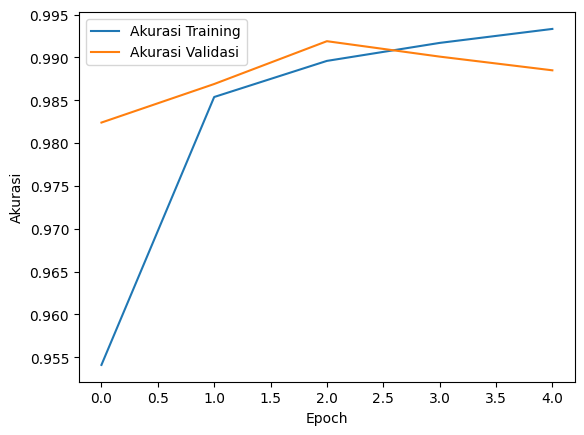

In [6]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Akurasi pada data uji: {test_acc:.4f}')

# Plot hasil akurasi dan loss
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()